# Reading Data

In [1]:
#pip install pandas

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_colwidth',100)
data = pd.read_csv('24k.csv')
print (data)

                                                                       comment
0           aa judges ni change cheysey daka programme chuddam manestey better
1                        Aa kamma koritala gaadu kavalni chetta cinema teesadu
2      Aa Karthika deepam timing marchesthe intlo chala mandi matches chudachu
3                  Aa Kick ye veeru yenni sarlu chusinaa chudali anipisthundhi
4                                            Aa kothi dancer ni pampandi mundu
...                                                                        ...
23852                                                     Jelo pettandi vadini
23853     Anil garu\nMiru rithu antunaru raithula kastalu miku thelusa ra sale
23854               Satish Kumar ni kotandi brother vadu pastor useless fellow
23855                                                       Vadu chillara gadu
23856                           Bokkara ne abivruddi soniyamma Neku chepindara

[23857 rows x 1 columns]


# Preprocessing

In [4]:
import string
def remove_punctuation(txt):
    txt_nopunct="".join([word for word in txt if word not in string.punctuation])
    return txt_nopunct
data['msg_clean']=data['comment'].apply(lambda x: remove_punctuation(x))
print(data)

                                                                       comment  \
0           aa judges ni change cheysey daka programme chuddam manestey better   
1                        Aa kamma koritala gaadu kavalni chetta cinema teesadu   
2      Aa Karthika deepam timing marchesthe intlo chala mandi matches chudachu   
3                  Aa Kick ye veeru yenni sarlu chusinaa chudali anipisthundhi   
4                                            Aa kothi dancer ni pampandi mundu   
...                                                                        ...   
23852                                                     Jelo pettandi vadini   
23853     Anil garu\nMiru rithu antunaru raithula kastalu miku thelusa ra sale   
23854               Satish Kumar ni kotandi brother vadu pastor useless fellow   
23855                                                       Vadu chillara gadu   
23856                           Bokkara ne abivruddi soniyamma Neku chepindara   

               

In [5]:
#pip install nltk

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\n1704\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import re
def tokenize(txt):
    tokens=re.split('\W+',txt)
    return tokens
data['tokenized']=data['msg_clean'].apply(lambda x: tokenize(x.lower()))
print(data.head())

                                                                   comment  \
0       aa judges ni change cheysey daka programme chuddam manestey better   
1                    Aa kamma koritala gaadu kavalni chetta cinema teesadu   
2  Aa Karthika deepam timing marchesthe intlo chala mandi matches chudachu   
3              Aa Kick ye veeru yenni sarlu chusinaa chudali anipisthundhi   
4                                        Aa kothi dancer ni pampandi mundu   

                                                                 msg_clean  \
0       aa judges ni change cheysey daka programme chuddam manestey better   
1                    Aa kamma koritala gaadu kavalni chetta cinema teesadu   
2  Aa Karthika deepam timing marchesthe intlo chala mandi matches chudachu   
3              Aa Kick ye veeru yenni sarlu chusinaa chudali anipisthundhi   
4                                        Aa kothi dancer ni pampandi mundu   

                                                              

In [29]:
eng_stopwords = set(stopwords.words("english"))

tel_stopwords = ["chetha","cheta","valana","gurchi","goorchi","koraku","andhu","ori","oree","ooyee","oyee","ooyi","oosee","osee","oosi","osi","ee","e","aa","a","nunchi","kudaa","kuda","kooda","koodaa","mi","mii","me","mee","na","naa","un","oka","undhi","vundhi","vundi","vundhe","vunde","unde","undhe","undi","kani","kaani","kanee","idhi","ide","kosam","tha","ayithe","aithe","ayitha",
              "aitha","aite","ayite","ma","ante","antaa","anta","chala","ila","ilaa","ela","vunde","unde","vunda","unda","ane","anaa","vari","vaari","meeru","meru","miru","ela","ala","peru","veeti","ippu","eppu","gurinchi","vara","pun","andhu","paatu","patu","ann","pa","dhee","oo","ani","ki","ku","la","em","inka","enka","ni","ye","ra","du","1","2","3","4","5","6","7","8","9","0",
              "lo","ga","u","ne","tho","anna","adi","ra","ur","iam","im","anna","bro","sis","plz","asalu","antha","nee","andi","enti","mari","ledhu","lu","chesi","kadha","ka","valla","vallu","anni","adhi","malli","ke","ekkada","entha","dont","didnt","kadu","unte","appudu","enni","Enduku","emi","meku","unna","okka","chusi","chesa","edi","raa","meeku","vere",
                 "niku","katti","chusina","idi","laga","epudu","mundu","edhi","leda","entra","cant","anti","chepu","neku","naaku","elanti","sari","ippudu","sarlu","nundi","baaga","rey","intha","evaru","kanna","meda","ilanti","gari","gadu","sir","video","please","super","good","like","videos","one","thank","best","garu","naku","hi","much","use","thanks","nice","also","pls","kada","mana","cheyandi","channel","telugu",
                 "rishi","great","brother","cheppandi","reply","try","ledu","know","baga","really","r","vasu","keep","first","manchi","want","next","tell","nuvvu","get","madam","give","see","many","number","k","us","change","every","tq","better","name","think","last","th","reddy","take","endhuku","comment","cheyali","maa","full" "need","go","chesina","ok","n","babu","manam","eppudu","even","chesaru","hai","amazing","vedio","correct",
                 "always","lot","sister","memu","say","maku","cheppandi","may","doubt","kavali","would","well","ekkuva","going","ha","nd","cheyyandi","yes","come","chepparu","cheppu","cheste","nuvu","gaa","meeda","got","made","chaala","useful","chesanu","bad","already","two","hello","avi","never","chese","type","andharu","konchem","said","plzz","ah","untundi","chey","pani","kadhu","nv","without","annaya","miku","akkada","aina","varaku","thing","konchem","g","true","konni","matram","mm","let",
                 "chinna","de","hii","vallaki","andhuke","nu","ade","neeku","okasari","se","gaaru","giving","per","chestaru","vasthundi","daggara","madni","add","c","vunna","cheyyali","petti","vachindi","still","vunte","lekunda","cheyadam","undali","endhuku","untundhi","sorry","antaru","annaru","tried","sure","make","enduku","new","bagundi","daily","roju","day","ami","ayina","yela","anthe","leka","emo","anthe","gani","akka","amma","nenu",'news',"broo"]

special_chars=["Ã"," ","","¢","ï","à",'ù',"ð","Ã¢?Â¦","?","¦",'~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/']

C:\Users\n1704\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
def dele_stopwords_english(txt):
    txt_rsw=[word for word in txt if word not in eng_stopwords]
    return txt_rsw
def dele_stopwords_telugu(txt):
    txt_rsw=[word for word in txt if word not in tel_stopwords]
    return txt_rsw
def del_special_chars(txt):
  txt_rsw=[word for word in txt if word not in special_chars]
  return txt_rsw
temp=data['english']=data['tokenized'].apply(lambda x: dele_stopwords_english(x))
data['telugu']=data['english'].apply(lambda x: dele_stopwords_telugu(x))
data['telugu']=data['telugu'].apply(lambda x: del_special_chars(x))

C:\Users\n1704\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
from nltk import FreqDist
all_words = []
[all_words.extend(text) for text in data['telugu']]
fdist = FreqDist(all_words)
print("Total unique words in corpus: ", len(fdist))

Total unique words in corpus:  29555


C:\Users\n1704\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
k = 1000
top_k_words = fdist.most_common(k)
print(top_k_words[:1000])

[('movie', 661), ('england', 472), ('match', 450), ('love', 415), ('phone', 392), ('world', 368), ('mobile', 356), ('episode', 307), ('cup', 283), ('cricket', 255), ('time', 250), ('dhoni', 249), ('story', 246), ('madhu', 243), ('kathi', 238), ('song', 233), ('serial', 231), ('review', 219), ('zealand', 218), ('team', 206), ('win', 203), ('bayya', 198), ('comedy', 197), ('india', 195), ('game', 193), ('film', 192), ('congratulations', 192), ('ever', 185), ('life', 184), ('fan', 182), ('nz', 182), ('cinema', 181), ('mahesh', 180), ('final', 180), ('upload', 179), ('arey', 177), ('acting', 171), ('voice', 167), ('superb', 164), ('face', 153), ('help', 153), ('full', 150), ('shannu', 150), ('music', 148), ('bagundhi', 147), ('back', 147), ('jai', 145), ('boss', 145), ('fans', 143), ('camera', 140), ('class', 139), ('short', 138), ('real', 138), ('big', 137), ('icc', 137), ('happy', 136), ('app', 136), ('bhai', 134), ('waiting', 131), ('oil', 126), ('support', 124), ('mam', 123), ('bhayya'

In [12]:
top_k_words,_ = zip(*fdist.most_common(k))
top_k_words = set(top_k_words)
def keep_top_k_words(text):
    return [word for word in text if word in top_k_words]

top_k_words_sentences= []
for text in data['telugu']:
    top_k_words_sentences.append(keep_top_k_words(text))
print(data['telugu'][:100])
top_k_words_sentences[:100]

0                       [judges, cheysey, daka, programme, chuddam, manestey]
1                  [kamma, koritala, gaadu, kavalni, chetta, cinema, teesadu]
2     [karthika, deepam, timing, marchesthe, intlo, mandi, matches, chudachu]
3                      [kick, veeru, yenni, chusinaa, chudali, anipisthundhi]
4                                                   [kothi, dancer, pampandi]
                                       ...                                   
95                                       [aadiri, poendi, block, baster, hit]
96             [aadollapataki, aadollu, magavalla, pataki, magavallu, veyali]
97                                    [aadu, cheppedhe, lovada, sodhi, sodhi]
98                     [aadu, koddo, kastho, unnode, aadu, pavement, payment]
99                                           [aadu, nag, dharidhrapu, adhava]
Name: telugu, Length: 100, dtype: object


[[],
 ['chetta', 'cinema'],
 ['intlo', 'mandi', 'matches'],
 ['chudali'],
 [],
 ['andaru', 'pothe'],
 [],
 ['love', 'bgm', 'movie', 'chepandi'],
 [],
 [],
 ['music', 'matalu'],
 ['negative', 'character', 'moham', 'moham'],
 [],
 ['ntr', 'vedava'],
 [],
 ['chei'],
 ['tappa'],
 ['phone'],
 ['photo'],
 ['navvu'],
 ['bokka', 'screen', 'time', 'bokka'],
 [],
 [],
 ['action', 'chudaleka'],
 ['alanti'],
 [],
 ['anchor', 'action'],
 ['ardham'],
 ['chayandi', 'swamy'],
 ['action'],
 ['action'],
 ['serial'],
 ['short', 'story', 'papa', 'story'],
 [],
 [],
 ['sri', 'waste'],
 ['funny'],
 ['voice', 'sri', 'sai', 'prasad', 'voice'],
 ['baguntundi', 'face'],
 ['ayya', 'baabu'],
 ['title', 'master', 'pettu'],
 ['title', 'views', 'cheyala'],
 ['unnaru'],
 ['close'],
 [],
 ['waste', 'job', 'job'],
 [],
 ['full', 'movie'],
 ['aadhi', 'combination'],
 ['aadhi'],
 ['aadhi', 'chance', 'evvandi'],
 ['aadhi', 'chalu'],
 ['aadhi', 'bhanu', 'jodi'],
 ['aadhi', 'program'],
 ['aadhi', 'chetta', 'climax'],
 ['aad

In [13]:
final_data = []

new2oldindex_map = {}

old_index = 0
new_index = 0
# for text  in top_k_words_sentences:
#     string=text.split()
#     for word in string:
#         if len(string)<=1:
#             text.replace(word,"")

for text in top_k_words_sentences:
    if(len(text) >=6):
        new2oldindex_map[new_index] = old_index
        final_data.append(text)
        new_index += 1
        
    old_index += 1
texts=final_data
print("Total docs before processing: ", len(top_k_words_sentences))
print("Total docs after processing: ", len(final_data))

Total docs before processing:  23857
Total docs after processing:  517


In [14]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(final_data)

corpus = []
for text in final_data:
    new = id2word.doc2bow(text)
    corpus.append(new)


In [15]:
corpus[:10]

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (5, 1), (6, 3), (7, 1)],
 [(8, 1), (9, 1), (10, 2), (11, 1), (12, 1)],
 [(13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1)],
 [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)],
 [(20, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)],
 [(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [(38, 1), (39, 2), (40, 1), (41, 2)],
 [(42, 1), (43, 2), (44, 1), (45, 1), (46, 1)],
 [(47, 1), (48, 1), (49, 1), (50, 2), (51, 1)]]

# Model Development

In [16]:
import gensim
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=50,
#                                            passes=10,
#                                            alpha="auto",
#                                            per_word_topics = True)

In [17]:
from gensim.models import CoherenceModel
# coherence_model_lda=CoherenceModel(model=lda_model,texts=final_data,dictionary=id2word)
# coherence_lda=coherence_model_lda.get_coherence()
# coherence_lda

In [18]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                   id2word=id2word,
                                                   num_topics=num_topics,
                                                   update_every=1,
                                                   chunksize=50,
                                                   passes=10,
                                                   alpha="auto",
                                                   random_state=12                                                   
                                               )

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model,texts=texts, corpus=corpus, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(num_topics,"Topics Completed\n")
    return model_list, coherence_values

3 Topics Completed

4 Topics Completed

5 Topics Completed

6 Topics Completed

7 Topics Completed

8 Topics Completed

9 Topics Completed

10 Topics Completed

11 Topics Completed

12 Topics Completed

13 Topics Completed

14 Topics Completed



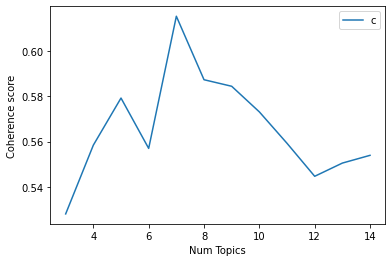

In [19]:
import matplotlib.pyplot as plt
limit=15; start=3; step=1;
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, 
                                                       limit=limit,start=start, step=step)

x = range(start, limit, step)
plt.plot(x,coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.528
Num Topics = 4  has Coherence Value of 0.5584
Num Topics = 5  has Coherence Value of 0.5793
Num Topics = 6  has Coherence Value of 0.557
Num Topics = 7  has Coherence Value of 0.6155
Num Topics = 8  has Coherence Value of 0.5874
Num Topics = 9  has Coherence Value of 0.5845
Num Topics = 10  has Coherence Value of 0.5731
Num Topics = 11  has Coherence Value of 0.5592
Num Topics = 12  has Coherence Value of 0.5446
Num Topics = 13  has Coherence Value of 0.5505
Num Topics = 14  has Coherence Value of 0.5539


In [21]:
# Select the optimal model and check the topics (if required)
optimal_model = model_list[3]
#model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics())

[(0, '0.086*"england" + 0.050*"win" + 0.047*"india" + 0.034*"another" + 0.033*"beat" + 0.028*"content" + 0.028*"country" + 0.022*"newzealand" + 0.021*"team" + 0.018*"hero"'), (1, '0.064*"support" + 0.051*"telangana" + 0.045*"love" + 0.035*"media" + 0.029*"power" + 0.022*"arey" + 0.022*"story" + 0.020*"yentha" + 0.019*"episode" + 0.017*"kcr"'), (2, '0.046*"match" + 0.038*"superb" + 0.032*"song" + 0.030*"show" + 0.028*"funny" + 0.026*"greatest" + 0.025*"ever" + 0.023*"real" + 0.022*"stokes" + 0.020*"hard"'), (3, '0.082*"world" + 0.073*"cup" + 0.044*"dhoni" + 0.037*"virus" + 0.034*"shannu" + 0.034*"cricket" + 0.033*"icc" + 0.028*"zealand" + 0.028*"final" + 0.027*"nz"'), (4, '0.061*"jai" + 0.047*"class" + 0.045*"madhu" + 0.045*"middle" + 0.036*"film" + 0.029*"telangana" + 0.027*"mahesh" + 0.026*"short" + 0.023*"ina" + 0.022*"music"'), (5, '0.092*"movie" + 0.050*"fan" + 0.026*"big" + 0.023*"orey" + 0.020*"winner" + 0.020*"acting" + 0.019*"emotional" + 0.014*"ashwin" + 0.014*"guru" + 0.014*"

In [22]:
test_doc = corpus[100]
print(corpus[100])
vector=sorted(optimal_model.get_document_topics(test_doc),key=lambda x: x[1],reverse=True)
print(vector)

[(106, 1), (251, 1), (348, 1), (349, 1), (350, 2), (351, 3)]
[(3, 0.50657207), (5, 0.40757126), (1, 0.025667436), (0, 0.02301822), (4, 0.019086784), (2, 0.018084237)]


# Visualization

In [23]:
import pyLDAvis
import pyLDAvis.gensim_models

In [24]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word, mds="mmds")
pyLDAvis.save_html(vis,"lda.html")
vis

C:\Users\n1704\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\n1704\appdata\local\programs\python\python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.172159  0.260341       1        1  23.750898
1      0.320074  0.005139       2        1  17.012581
0     -0.300943 -0.020212       3        1  15.825598
4      0.162169 -0.265800       4        1  15.164805
5      0.126425  0.254041       5        1  14.439989
2     -0.135566 -0.233509       6        1  13.806129, topic_info=        Term       Freq      Total Category  logprob  loglift
375    world  67.000000  67.000000  Default  30.0000  30.0000
71     movie  46.000000  46.000000  Default  29.0000  29.0000
484  england  47.000000  47.000000  Default  28.0000  28.0000
524      cup  60.000000  60.000000  Default  27.0000  27.0000
171  support  38.000000  38.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
192   laptop   3.603414   4.290498   Topic6  -4.8778   1.8055
439     cena   3.546582   4.232117   Topic6  -4.8937   1.8033
467    match  21.850780  32.280998   Topic6  -3.0754   1.5898
551  respect   8.139153  12.382526   Topic6  -4.0630   1.5605
550   played   5.556221   9.209458   Topic6  -4.4448   1.4747

[231 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
615       2  0.518821       10
615       5  0.415057       10
13        6  0.826521     abba
156       6  0.872923  account
20        5  0.965063   acting
...     ...       ...      ...
410       1  0.948086    worst
571       3  0.816072    years
279       2  0.971986   yentha
522       1  0.725180  zealand
522       3  0.252237  zealand

[207 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 5, 6, 3])

# Testing

In [70]:
#new_sentence ="esari world cup india gelustundi"
#new_sentence ="ntr acting movies lo baguntundi"
#new_sentence ="india team lo virat form loki vacchadu"
#new_sentence = "kcr trs ki goppa nayakudu"
#new_sentence = "middle class madhu comedy super"
new_sentence="Aa Karthika deepam timing marchesthe intlo chala mandi matches chudachu"

C:\Users\n1704\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
import numpy as np
bow = id2word.doc2bow([word for word in new_sentence.split()])
topics = sorted(optimal_model.get_document_topics(bow), key=lambda x: (x[1]), reverse=True)

# Print the top topic and its associated percentage
print(bow)
print("Top topic: ", optimal_model.show_topic(topics[0][0]))
temp=optimal_model.show_topic(topics[0][0])
topic_name=''
print(temp[0][0])
if(temp[0][0]=='world' or temp[0][0]=='england' or temp[0][0]=='match'):
    topic_name="Sports"
elif(temp[0][0]=='class' or temp[0][0]=='movie' or temp[0][0]=='jai'):
    topic_name="Entertainment (movies,serials,webseries)"
elif(temp[0][0]=='support'):
    topic_name="Politics"
else:
    topic_name="I'm Sorry I couldn't find!!"
    

#print("Top topic:",topics[0])
print("Associated %: ", np.round(topics[0][1]*100,2), "%")
print("The topic name: ",topic_name)


[(130, 1), (560, 1)]
Top topic:  [('england', 0.086173445), ('win', 0.04960968), ('india', 0.046990037), ('another', 0.034493826), ('beat', 0.032577887), ('content', 0.028293518), ('country', 0.028105298), ('newzealand', 0.021911459), ('team', 0.021315025), ('hero', 0.018139377)]
england
Associated %:  37.87 %
The topic name:  Sports


C:\Users\n1704\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
testdata = pd.read_csv('testing.csv')
print (testdata)

                                                                       comment  \
0                                           "esari world cup india gelustundi"   
1                                            "ntr acting movies lo baguntundi"   
2                                     "india team lo virat form loki vacchadu"   
3                                                  "kcr trs ki goppa nayakudu"   
4                                            "middle class madhu comedy super"   
..                                                                         ...   
489                            Adult movies ekkuva ayyayi e madhya industry la   
490                                         Adyna dabbu unte aa enjoyment veru   
491  Ae serial lo chusina ede vishwasam movie bgm emo prati emotion ki ide bgm   
492                                   Aegte onion hair oil review cheyandi sis   
493                                 Aekkada tesukunnaru ee dresses online lona   

    topic predi

C:\Users\n1704\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
for x in testdata['comment']:
    print(x)
    testbow = id2word.doc2bow([word for word in x.split()])
    testtopics = sorted(optimal_model.get_document_topics(testbow), key=lambda x: (x[1]), reverse=True)
    
    temp=optimal_model.show_topic(testtopics[0][0])
    topic_name=[]
    if(temp[0][0]=='world' or temp[0][0]=='england' or temp[0][0]=='match'):
        topic_name.append("Sports")
    elif(temp[0][0]=='class' or temp[0][0]=='movie' or temp[0][0]=='jai'):
        topic_name.append("Entertainment (movies,serials,webseries)")
    elif(temp[0][0]=='support'):
        topic_name.append("Politics")
    else:
        topic_name.append("I'm Sorry I couldn't find!!")
    print(topic_name)
    print("\n")
    testdata['topic']=x in topic_name
    

C:\Users\n1704\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"esari world cup india gelustundi"
['Sports']


"ntr acting movies lo baguntundi"
['Entertainment (movies,serials,webseries)']


"india team lo virat form loki vacchadu"
['Sports']


"kcr trs ki goppa nayakudu"
['Politics']


"middle class madhu comedy super"
['Entertainment (movies,serials,webseries)']


Dhoni next world cup ki vuntada
['Sports']


steve smith icc rules follow avvaledhani ban chesaru
['Sports']


Aa Karthika deepam timing marchesthe intlo chala mandi matches chudachu
['Sports']


trs party sarigga panichesthundhi
['Politics']


Aa kothi dancer ni pampandi mundu
['Sports']


williamson best test batsman
['Sports']


Aa Love Track BGM A Movie LoDho Yavaraina Chepandi Bhiya
['Sports']


Aa music entra babu cheppadaniki matalu levu
['Entertainment (movies,serials,webseries)']


Aa negative Character artist moham achaam kothi moham la vundhi
['Sports']


Aa NTR gaadu vangaveeti mohana Ranga gaari ni champimchina lucha vedava
['Sports']


Aa penta mundaliddariki vere panemi

['Entertainment (movies,serials,webseries)']


Acctual ga idhi chusi nijam anukuntaru nibba nibbis Kani idhi kuda scripted aa
['Sports']


acharya lo mega mafia acting kante nee acting super bro
['Entertainment (movies,serials,webseries)']


Acharya movie kante vedi action bagundi
['Politics']


achina education motham debba thintadhi frank bagundhi kani naku nachaledhu sry ajay garu
['Entertainment (movies,serials,webseries)']


Achu thaman gadini chusinate undhi
['Sports']


achyutha kumari alrdy chesaru kotaru kuda
['Sports']


Acne scars ki derma roler use cheyavachha
['Sports']


Acp mari over ekkuvuga chesthundi acp madam over action baga ekkuvindi konchem thagginchukondi
['Sports']


Acting a radhu kani short film kavala prema niku
['Entertainment (movies,serials,webseries)']


Acting adhurs expressions mamulaga levu keka
['Entertainment (movies,serials,webseries)']


Acting bagundhu Story bagundhi Nice concept
['Entertainment (movies,serials,webseries)']


Acting chalaa bagundh



Adhi sandhya ni love chestunadhu ani anukunevsllu comment pls
['Politics']


Adhi Sudheer anna set mothaniki anna undali ala ana
['Entertainment (movies,serials,webseries)']


Adhi sudheer rashmi Roja garu super mee skits ante chala estam
['Entertainment (movies,serials,webseries)']


Adhi sudher tho jokes thaginchu
['Sports']


Adhi tanu worst performer ki nominate ennadu joke ga nomination gurinchi kadu
['Sports']


Adhi telicast Chesi untey undehdi sir Siri ki janalu thanni Mari pampeyvallu
['Sports']


Adhi telisi kuda endhuku pakkalu vestharu appudu mogudi viluva theliyadhu kadha
['Sports']


Adhika dhana sampadanaki emi chayali
['Politics']


Adhitya bro ki assal Hindi nerpodhu
['Sports']


Adhitya ki hindhi rakuntane comedy ga vuntadhi script
['Sports']


Adhitya rukku Lani kalapandi plz
['Sports']


Adho doctor chepinatllu cheptundi
['Sports']


Adhoka serial na malli daniki interview
['Entertainment (movies,serials,webseries)']


Adi ane name ni dia ani marchochu same alphab